In [5]:
import nltk
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
#transform
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

df = pd.read_csv('df_comb_with_mood.csv')
print(df.columns)
df.head()


Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'SLink', 'Lyric',
       'language', 'Genres', 'clean lyric', 'Mood'],
      dtype='object')


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,liveness,valence,tempo,time_signature,SLink,Lyric,language,Genres,clean lyric,Mood
0,1XXimziG1uhM0eDNCZCrUl,Up,92,156945,1,cardi b,['4kYSro6naA4h99UJvo89HB'],2021-02-05,0.868,0.795,...,0.0461,0.819,166.000,4,/cardi-b/up.html,"Up, up, up (Ayy) , up (Uh) , up, look (This is...",en,"['Hip Hop', 'Rap']",ayy uh look fire upon time man heard ugly came...,Inspiring
1,35mvY5S1H3J2QZyna3TFe0,positions,92,172325,1,ariana grande,['66CXWjxzNUsdJxJ2JdwvnR'],2020-10-30,0.737,0.802,...,0.0931,0.682,144.015,4,/ariana-grande/positions.html,Heaven sent you to me\nI'm just hopin' I don't...,en,"['Pop', 'Dance', 'Romântico']",heaven sent im hopin dont repeat history boy i...,Sad
2,4u4NyuceXP7Uzh7XFJKCr1,Hold On,92,170813,0,justin bieber,['1uNFoZAHBGtllmzznpCI3s'],2021-03-05,0.658,0.634,...,0.1320,0.290,139.980,4,/justin-bieber/hold-on.html,You know you can call me if you need someone\n...,en,"['Dance', 'Pop', 'Romântico']",know call need someone ill pick piece come und...,Inspiring
3,1tkg4EHVoqnhR6iFEXb60y,What You Know Bout Love,91,160000,1,pop smoke,['0eDvMgVFoNV3TpwtrVCoTj'],2020-07-03,0.709,0.548,...,0.1330,0.543,83.995,4,/pop-smoke/what-you-know-bout-love.html,Shawty go jogging every morning (every morning...,en,"['Trap', 'Hip Hop']",shawty go jogging every morning every morning ...,Hopeful
4,4saklk6nie3yiGePpBwUoc,Dynamite,91,199054,0,bts,['3Nrfpe0tUJi4K4DXYWgMUX'],2020-11-20,0.746,0.765,...,0.0936,0.737,114.044,4,/bts/dynamite.html,"'Cause ah, ah, I'm in the stars tonight\nSo wa...",en,"['K-Pop', 'K-Rock']",cause ah ah im star tonight watch bring fire s...,Hopeful


Clustering by the song's sound features
- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
Run Elbow Method to determine what's the best cluster number for the dataset

/Users/haozhiliao/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haozhiliao/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haozhiliao/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haozhiliao/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

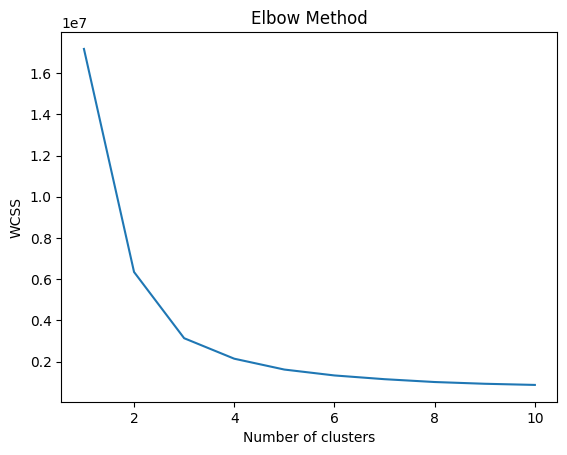

In [6]:
from sklearn.cluster import KMeans

clustering_cols = ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[clustering_cols])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above plot, there would be 4 clusters.
Then run the KMeans to assign the cluster to each song and add the dataframe

In [7]:
kmeans = KMeans(n_clusters=4)
predicted_cluster = kmeans.fit_predict(df[clustering_cols])
df['cluster'] = predicted_cluster
print(df['cluster'].value_counts())
df.head()
df.to_csv('df_comb_clustered.csv', index=False)

/Users/haozhiliao/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
2    6134
3    5298
0    5180
1    2662
Name: count, dtype: int64
